<a href="https://colab.research.google.com/github/rnmarin/portfolio/blob/main/AnaliseDadosViolencianoRJpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


###<center>**Renan Marin: Accountant, but not a common accountant**<center>

---

 # <center> **Análise de Dados sobre a violência na cidade do Rio de Janeiro** <center/>
 
#### <center> Um panorama estatísco sobre uma das cidades mais emblemáticas do mundo.
<br>
<center><img alt="Analisando Airbnb" width="80%" src="https://diariodorio.com/wp-content/uploads/2016/06/Violencia-Rio-de-Janeiro1.jpg"></center>

De modo geral o Brasil é assolado pelo da mal da falta de segurança em diversas cidades. A violência é sempre um assunto que está em pauta nos princípais meios de comunicação. Sua origem histórica pode ser observada com mais presença em países subdesenvolvidos associados com o problema da diferença social.

<br>

Este presente artigo visa analisar de forma sistemática dados sobre a violência na cidade do **Rio de Janeiro** fornecidos pelo [ISP - Instituto de Segurança Pública do Rio de Janeiro](http://www.ispdados.rj.gov.br/estatistica.html).



## Obtenção dos Dados


Os dados foram obtidos diretamento do portal ISPDados, que é uma página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro.

As estatísticas divulgadas no portal são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias de Polícia Civil do Estado do Rio de Janeiro, além de informações complementares de órgãos específicos da Polícia Militar do Estado do Rio de Janeiro.

Como forma de criar um controle de qualidade, antes de serem consolidados no ISP os RO são submetidos à Corregedoria Interna da Polícia Civil (COINPOL). As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.

No caso do *dataset* a ser utilizado aqui, o arquivo `csv` pode ser baixado diretamente [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv).

## Objetivo 

O objetivo do presente trabalho é analisar de forma exploratória as informaçãos sobre os dados da segurança pública do Rio de Janeiro e poder extrair insights colocando em pratica as funcionalidades básicas de *data science* nas libs pandas, matplotlib e seaborn.

Para melhor estruturação do desenvolvimento da analise, enfatizaremos os seguintes tópicos no decorrer desse trabalho:

* Escalada da guerra: polícia x bandidos
* Policiais civis e militares mortos em trabalho
* Crimes relacionados à veiculos
* Homicídos
* Tráfico de drogas

## Importando Dados

In [2]:
#Importando libs e dataframe
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")


## Análise Inicial dos Dados

Os dados no dataframe estão subdividdos em anos e meses, disponíveis a partir do mes de janeiro de 1991 até agosto de 2019. A seguir algumas informações sobre a disposição dos dados:   




* Tamanho do DataFrame:


In [3]:
df.shape

print(f'Número de Linhas:',df.shape[0])
print(f'Número de Colunas:',df.shape[1])

Número de Linhas: 344
Número de Colunas: 56


O dataframe possuí 344 entradas e 56 variáveis.


* Colunas presentes no Dataframe:


In [4]:
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

As descrições das variáveis estão dispostas acima. Desta forma, agora é importante saber quais são os tipos de dados que essas variáveis possuem para  serem melhor analisados adiante.



* Tipos das variáveis:

In [5]:
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Pode-se perceber que o dataframe se resume em dados do tipo int64 e float64. Isso significa que ou os dados desse dataframe são números inteiros (int64) ou valores de ponto flutuante (float64), numéricos aproximados com componentes fracionários, resumindo: valores com vírgula.


* Visualização das 5 primeiras linhas do dataframe:


In [6]:
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


Acima é possível observar a disposição em que as informações se encontram. Um ponto de atenção observado é a quantidade das ocorrências de valor 'NaN'. Essa ocorrência refere-se a valores ausentes.

Valores ausentes são um problema a ser depurado na análise dos dados, pois estes podem as vezes comprometer ou inviesar a análise.

Referente aos dados dos crimes, podemos inferir, por se tratar de dados de um longo período de tempo, que pode ter havido falhas de registro ou mesmo tipologias de crimes novas no decorrer do tempo, criação de novas categorias, etc.

Assim, é muito importante termos uma visão geral da quantidade de dados que estão faltando.



* Porcentagem de valores ausentes das **colunas**:

In [7]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

Observando as saídas percebemos que exite uma grande quantidade de valores faltantes.

Avançaremos na análise exploratória para entender de que forma tratar os dados de maneira que isso não prejudique nas inferências sobre os dados.

A partir do método `describe`será possível verificar a distribuições dos valores.

## Informações Estatística dos Dados

O objetivo desta etapa é:

* Identificar outliers.
* Entender melhor a distribuição dos dados.
* Identificar falhas na distribuição dos dados.


In [8]:
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

As informações apresentadas através do método `describe` nos auxiliam para entener a disposição dos dados. Porém, não contribui para uma análise qualitativa sobre as variáveis.

Desta forma, optamos por resumir o comporatmento das varíaveis por ano, para que seja possível compreender o comporatamento dos mesmos sob a ótica do tempo.

O que faremos é resumir os dados somando as variáveis por ano:

In [9]:
df_year= df.groupby(['vano']).sum()
df_year.head()

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991,78,7518,0.0,205,0.0,2250,39053,0.0,0.0,0.0,5806,2441,16452,1021,11090,4249,347,0.0,0.0,0.0,0.0,0.0,1378,42784,23979,10944,0.0,0.0,0.0,42288,77211,0.0,0.0,0.0,0.0,1866,0.0,0.0,0.0,9890,0.0,0.0,0.0,0.0,0.0,0.0,1459,0.0,0.0,0.0,7723,15339,16452,0.0,36
1992,78,7635,0.0,288,0.0,1910,38489,0.0,0.0,0.0,5466,3080,24502,1936,10814,4810,227,0.0,0.0,0.0,0.0,0.0,1337,52172,27619,10402,0.0,0.0,0.0,44625,82646,0.0,0.0,0.0,0.0,2043,0.0,0.0,0.0,11246,0.0,0.0,0.0,0.0,0.0,0.0,849,0.0,0.0,0.0,7923,15624,24502,0.0,36
1993,78,7720,0.0,265,0.0,1741,37633,0.0,0.0,0.0,3639,2605,24790,1701,9780,4722,225,0.0,0.0,0.0,0.0,0.0,1487,48949,26897,7488,0.0,0.0,0.0,42283,76668,0.0,0.0,0.0,0.0,1749,0.0,0.0,0.0,11619,0.0,0.0,0.0,0.0,0.0,0.0,792,0.0,0.0,0.0,7985,14502,24790,0.0,36
1994,78,8408,0.0,223,0.0,1766,35697,0.0,0.0,0.0,4403,2273,27470,1386,11653,4759,310,0.0,0.0,0.0,0.0,0.0,1704,53958,26231,6917,0.0,0.0,0.0,36343,69491,0.0,0.0,0.0,0.0,1830,0.0,0.0,0.0,16030,0.0,0.0,0.0,0.0,0.0,0.0,913,0.0,0.0,0.0,8631,16412,27470,0.0,36
1995,78,8438,0.0,200,0.0,1944,38469,0.0,0.0,0.0,3886,1625,23676,1198,11381,5126,440,0.0,0.0,0.0,0.0,0.0,1939,49271,21928,6414,0.0,0.0,0.0,31644,59986,0.0,0.0,0.0,0.0,3508,0.0,0.0,0.0,17622,0.0,0.0,0.0,0.0,0.0,0.0,1133,0.0,0.0,0.0,8638,16507,23676,0.0,36


A partir dos valores agrupados por ano é possível se ter uma visualização consolidada. Desta forma nos permitirá a entender o comportamento das variáveis em relação aos períodos.

A partir de agora, iremos elencar algumas variáveis e analisá-las individualmente.

## Analisando a Correlação de Dados Selecionados


In [10]:
corr = df_year[[ 'latrocinio','hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa',
                'estupro','hom_culposo', 'lesao_corp_culposa', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv']].corr()

display(corr)

,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,pol_militares_mortos_serv,pol_civis_mortos_serv
latrocinio,1.000000,-0.045769,-0.179379,-0.210707,-0.266588,-0.218573,-0.133398,0.127989,-0.213251,-0.314397,-0.273351,-0.372293,-0.290372,-0.265627,-0.231536,0.038678,0.013351
hom_por_interv_policial,-0.045769,1.000000,0.689503,0.542398,0.604550,0.553010,0.540585,0.529160,0.615985,0.466604,0.582829,0.497403,0.373410,0.417771,0.463978,0.756211,0.612763
tentat_hom,-0.179379,0.689503,1.000000,0.689381,0.881086,0.396306,0.588835,0.418700,0.810431,0.839963,0.902007,0.916124,0.870246,0.882024,0.820454,0.680127,0.441938
lesao_corp_dolosa,-0.210707,0.542398,0.689381,1.000000,0.695374,0.729518,0.891421,0.636066,0.704668,0.667007,0.625975,0.661515,0.510861,0.453009,0.592542,0.512069,0.554032
estupro,-0.266588,0.604550,0.881086,0.695374,1.000000,0.330122,0.547040,0.295125,0.942246,0.939923,0.978403,0.788080,0.865132,0.864720,0.889238,0.670040,0.582015
hom_culposo,-0.218573,0.553010,0.396306,0.729518,0.330122,1.000000,0.705391,0.443181,0.367168,0.290807,0.282966,0.442549,0.166334,0.148817,0.257012,0.323980,0.378630
lesao_corp_culposa,-0.133398,0.540585,0.588835,0.891421,0.547040,0.705391,1.000000,0.593695,0.546735,0.509378,0.504125,0.564933,0.408089,0.371309,0.469839,0.416580,0.416138
sequestro,0.127989,0.529160,0.418700,0.636066,0.295125,0.443181,0.593695,1.000000,0.305073,0.202666,0.230448,0.296933,0.071768,0.084178,0.124257,0.429338,0.416115
extorsao,-0.213251,0.615985,0.810431,0.704668,0.942246,0.367168,0.546735,0.305073,1.000000,0.927880,0.912598,0.707373,0.775483,0.750781,0.821954,0.675615,0.615591
sequestro_relampago,-0.314397,0.466604,0.839963,0.667007,0.939923,0.290807,0.509378,0.202666,0.927880,1.000000,0.916137,0.782364,0.861314,0.838662,0.849195,0.502895,0.496550


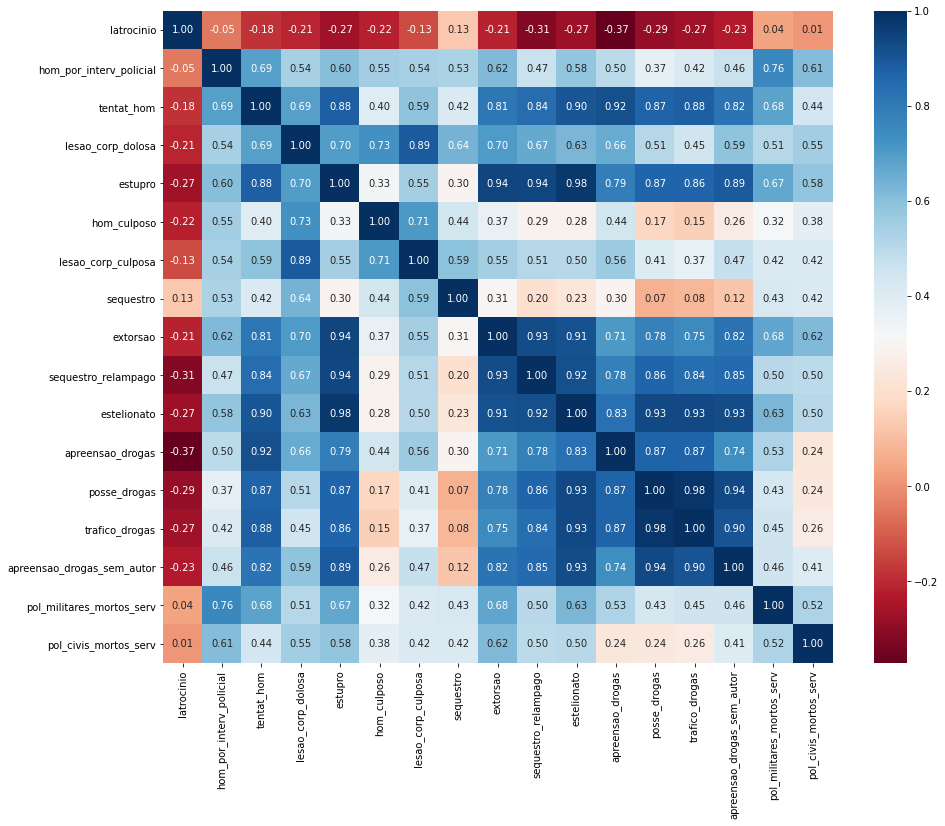

In [11]:
plt.figure(figsize=(15,12))
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=False, linecolor='white', annot=True);


Após a seleção de algumas variáveis identificamos algumas correlações entre elas. É interessante perceber como variáveis de categorias similares estão com correlação alta, como o caso das drogas. 

Uma informação interessante também é o fato de termos identificado uma correlação alta entre `pol_militares_mortos_serv` e `hom_por_interv_policial`. Isso pode significar um ciclo de resposta de ações?

Uma das duvidas que a apresentação do gráfico de calor gerou é se o mesmo evento pode ser enquadrado em mais de uma variável em relação ao dataset. Eu acredito que sim, pois existe uma série de correlações entre crimes de natureza próximas.

##Análise de Variáveis Individual

### A Escalada da Guerra 

Homícidio por Intervenção Policial:

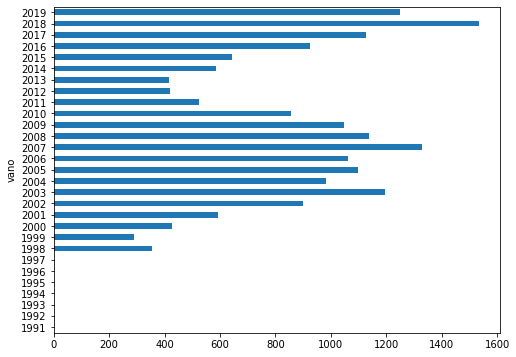

In [12]:
df_year.plot(y='hom_por_interv_policial',kind='barh', legend=False, figsize=(8,6));

Com a disposição dos dados é possível verificar que existe uma crescente taxa de homícidos por intervenção policial, alguns fatos interssante marcaram o ínicio do século 21 e podem estar ligados aos aumentos demonstrados.

As inferências aqui são meras suposições de fatos que podem ter ajudado a contribuir com os picos, que são:

* 2003: Alteração de partido na gestão do governo do estado;
* 2007: Visita do Papa ao Brasil;
* 2014: Copa do Mundo;
* 2016: Olímpiadas no Brasil - sede Rio de Janeiro;
* 2018: Intervenção federal no estado decretada;

### Famílias Desfalcadas

Policiais Civis e Militares mortos em serviço no período:

In [13]:
print(f'Numero total de Policiais Militares mortos:',df_year.pol_militares_mortos_serv.sum())
  
print(f'Numero total de Policiais Civis mortos:',df_year.pol_civis_mortos_serv.sum())

Numero total de Policiais Militares mortos: 417.0
Numero total de Policiais Civis mortos: 68.0


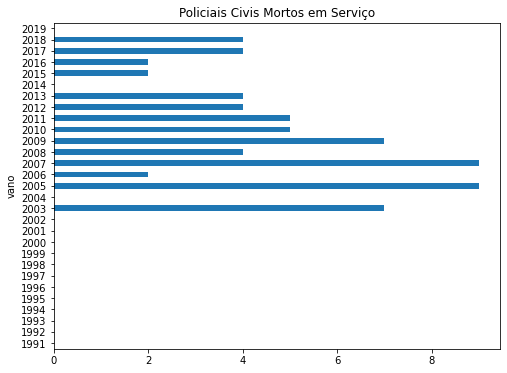

In [14]:
df_year.plot(y='pol_civis_mortos_serv',kind='barh', legend=False, figsize=(8,6), title='Policiais Civis Mortos em Serviço');

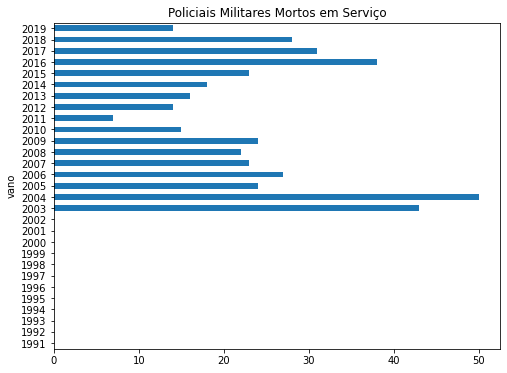

In [15]:
df_year.plot(y='pol_militares_mortos_serv',kind='barh', legend=False, figsize=(8,6), title='Policiais Militares Mortos em Serviço');

### Crimes com Véiculos



Furto de Veículos:

In [16]:
print(f'Numero total de Furto de Veículos:',df_year.furto_veiculos.sum())

Numero total de Furto de Veículos: 576087


Roubo de Veículos:

In [17]:
print(f'Numero total de Roubo de Veículos:',df_year.roubo_veiculo.sum())

Numero total de Roubo de Veículos: 842352


Número de Veículos Recuperados:

In [18]:
print(f'Numero total de Veículos Recuperados:',df_year.recuperacao_veiculos.sum())      

Numero total de Veículos Recuperados: 609650


Taxa de Recuperação de Veículos Furtados e Roubados:


In [21]:
round(df_year.recuperacao_veiculos.sum()/((df_year.roubo_veiculo.sum())+(df_year.furto_veiculos.sum())),2)

0.43

O percentual de veículos recuperados em relação aos roubados e furtados no período é de aproximadamente 43%.

### Homicídios


Distribuição de Homícidios Dolosos no período:

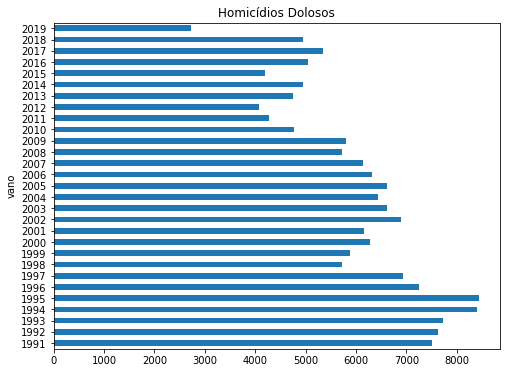

In [22]:
df_year.plot(y='hom_doloso',kind='barh', legend=False, figsize=(8,6), title='Homicídios Dolosos');

Distribuição de Homícidios Culposos no período:

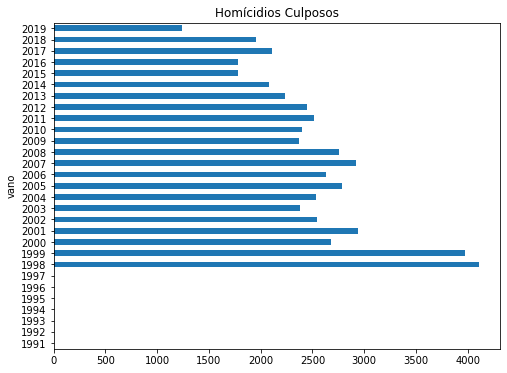

In [23]:
df_year.plot(y='hom_culposo',kind='barh', legend=False, figsize=(8,6), title='Homícidios Culposos');

Média de Homícidios por Ano:

In [28]:
print(f'Média de Homicídio Culposo por ano:',round(df_year.hom_culposo.mean()))
print(f'Média de Homicídio Doloso por ano:',round(df_year.hom_doloso.mean()))

Média de Homicídio Culposo por ano: 1902
Média de Homicídio Doloso por ano: 5985


Total de Homicídios no Período Analisado:

In [31]:
culp = df_year.hom_culposo.sum()
dolo = df_year.hom_doloso.sum()
total = culp + dolo
print(f'Total de Homícidios Culposo:', culp)
print(f'Total de Homícidios Doloso:', dolo)
print(f'Total de Homícidios(Culposo+Doloso):', total)

Total de Homícidios Culposo: 55151.0
Total de Homícidios Doloso: 173567
Total de Homícidios(Culposo+Doloso): 228718.0


Em relação aos homicídios, embora haja um comportamento de queda observavel nos gráficos parecendo ser uma questão que tende a melhorar, ao observar os totais identifiscamos como os número são assustadores.

Por exemplo, se compararmos com a [Guerra do Afeganisão](https://pt.wikipedia.org/wiki/Guerra_do_Afeganist%C3%A3o_(2001%E2%80%93presente)#:~:text=Entre%202001%20e%202015%2C%20cerca,Estados%20Unidos%20em%20sua%20hist%C3%B3ria.) onde os números são de 149.000 óbitos, este é o conflito mais longo na história dos Estados Unidos, contra 228.718 óbitos somente na cidade do Rio de Janeiro.

### Tráfico de Drogas

Aqui analisamos os números de crimes relacionados ao tráfico de drogas na cidade do Rio de Janeiro.

Foram selecionadas as seguintes variáveis para análise:

* `apreensao_drogas`
* `posse_drogas`
* `trafico_drogas`
* `apreensao_drogas_sem_autor`

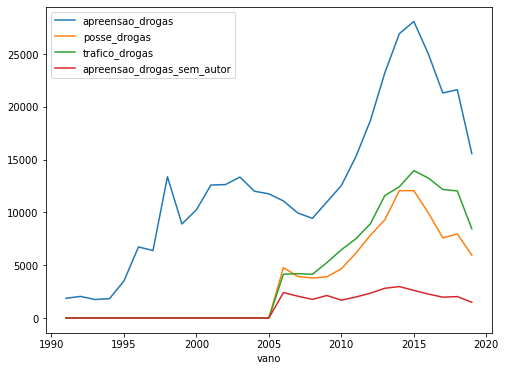

In [33]:
sel = ['apreensao_drogas','posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor']
df_year.plot(y = sel, kind='line', figsize=(8,6));

Pode-se observar que o pico dos números de crimes relacionados ao tráfico de drogas foi o ano de 2015, ultrapassando a marca de 25.000 ocorrências somente com apreensões de drogas.

As aprensões estiveram acima dos outros tipos de crimes em todo o período.

Nota-se também que as variáveis `posse_drogas`, `trafico_drogas` e `aprensao_drogas_sem_autor` iniciaram a ser computadas no ano de 2015.


##Conclusão

A partir do presente dataset pode-se analisar a distribuição dos dados de violência do período de 1991 a 2019 na cidade do Rio de Janeiro.

Observamos aqui principalmente números em relação à escalada da guerra: polícia x bandidos, números de policiais civis e militares mortos em trabalho, crimes relacionados à veiculos, homicídos e tráfico de drogas.

<br>

Uma conclusão triste porém realista é que estamos longe de estar vivenciando o melhor momento nos números em relação a violência na cidade do Rio de Janeiro.

<br>

Adicionalmente, o dataframe selecionado nos permitiu ainda a explorar os conteúdos das bibliotecas pandas, matplotlib e seaborn.

Espero que tenham gostado e se quiserem deixem feedbacks!